In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scikitplot as skplt
from scipy.stats import loguniform

In [ ]:
dados = pd.read_csv("/content/Default_Fin.csv")
dados.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
dados.shape

(10000, 5)

In [ ]:
dados = dados.drop(columns='Index')
dados.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [ ]:
dados['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [ ]:
dados['Bank Balance'].describe()

count    10000.000000
mean     10024.498524
std       5804.579486
min          0.000000
25%       5780.790000
50%       9883.620000
75%      13995.660000
max      31851.840000
Name: Bank Balance, dtype: float64

In [ ]:
data = go.Histogram(x=dados['Bank Balance'], marker_color='#330C73')
layout = go.Layout(title="Frequência de 'Bank Balance' ", xaxis=dict(title='Bank Balance'), yaxis=dict(title='Frequência'), )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dados['Annual Salary'].describe()

count     10000.000000
mean     402203.782224
std      160039.674988
min        9263.640000
25%      256085.520000
50%      414631.740000
75%      525692.760000
max      882650.760000
Name: Annual Salary, dtype: float64

In [ ]:
data = go.Histogram(x=dados['Annual Salary'], marker_color='#330C73')
layout = go.Layout(title="Frequência de 'Annual Salary' ", xaxis=dict(title='Annual Salary'), yaxis=dict(title='Frequência'), )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dados['Employed'].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [ ]:
dados.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


In [ ]:
data = go.Heatmap(z=dados.corr(method='spearman'), colorscale='magma', textfont={"size":20}, texttemplate="%{x}",)
layout = go.Layout(title="Verificando correlação entre as variáveis")
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
x = dados[['Employed', 'Annual Salary', 'Bank Balance']]
y = dados['Defaulted?'].values

In [ ]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

print(x_norm[0:5])

[[1.         0.59890501 0.27484629]
 [0.         0.15572696 0.30786793]
 [1.         0.4258616  0.40445387]
 [1.         0.47995926 0.19939193]
 [1.         0.51786699 0.29599295]]


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_norm, y, test_size=0.3, random_state=0)

print("Treino: ", x_treino.shape)
print("Teste: ", x_teste.shape)

Treino:  (7000, 3)
Teste:  (3000, 3)


In [ ]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

scoring = {"ACC": "accuracy", 'AUC':'roc_auc'}

random_CV = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=scoring, refit='AUC')

random_CV.fit(x_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   refit='AUC', scoring={'ACC': 'accuracy', 'AUC': 'roc_auc'})

In [ ]:
random_CV.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
random_CV.best_score_

0.9283621614373827

In [ ]:
previsao = random_CV.predict(x_teste)
acuracia = accuracy_score(y_teste, previsao)
print("Accuracy: ", acuracia)

Accuracy:  0.9706666666666667


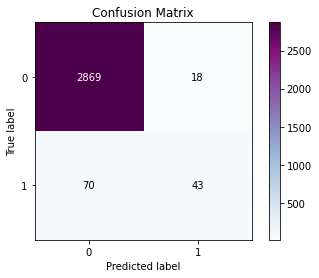

In [ ]:
skplt.metrics.plot_confusion_matrix(y_teste, previsao, cmap="BuPu")

In [ ]:
proba = random_CV.predict_proba(x_teste)
print("AUC", roc_auc_score(y_teste, proba[:,1]))

AUC 0.923117361624125


RL

In [ ]:
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'C' : loguniform(1e-5, 100)}

scoring = {"ACC": "accuracy", 'AUC':'roc_auc'}

logi_CV = RandomizedSearchCV(LogisticRegression(), param_grid, cv=5, scoring=scoring, refit='AUC')

logi_CV.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe1b5dc2310>,
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   refit='AUC', scoring={'ACC': 'accuracy', 'AUC': 'roc_auc'})

In [ ]:
logi_CV.best_estimator_

LogisticRegression(C=4.0532515589721445, solver='liblinear')

In [ ]:
logi_CV.best_params_

{'C': 4.0532515589721445, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
logi_CV.best_score_

0.9509218289085546

In [ ]:
previsao_logi = logi_CV.predict(x_teste)
acuracia_logi = accuracy_score(y_teste, previsao_logi)
print("Accuracy: ", acuracia_logi)

Accuracy:  0.9713333333333334


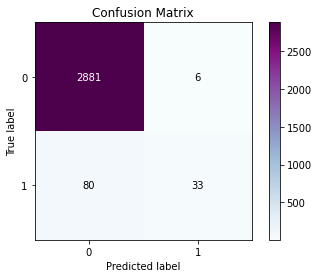

In [ ]:
skplt.metrics.plot_confusion_matrix(y_teste, previsao_logi, cmap="BuPu")

In [ ]:
proba_logi = logi_CV.predict_proba(x_teste)

In [ ]:
print("AUC", roc_auc_score(y_teste, proba_logi[:,1]))

AUC 0.9458911017040073


#Gráficos de comparação

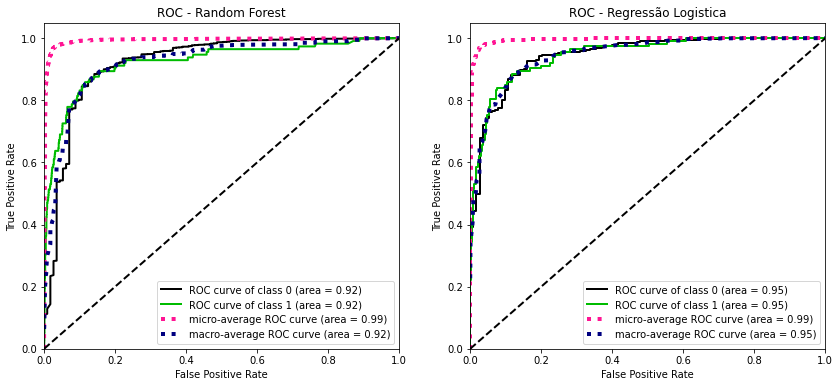

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_roc(y_teste, proba, ax=axs[0], title="ROC - Random Forest")
skplt.metrics.plot_roc(y_teste, proba_logi, ax=axs[1], title="ROC - Regressão Logistica")
plt.show()

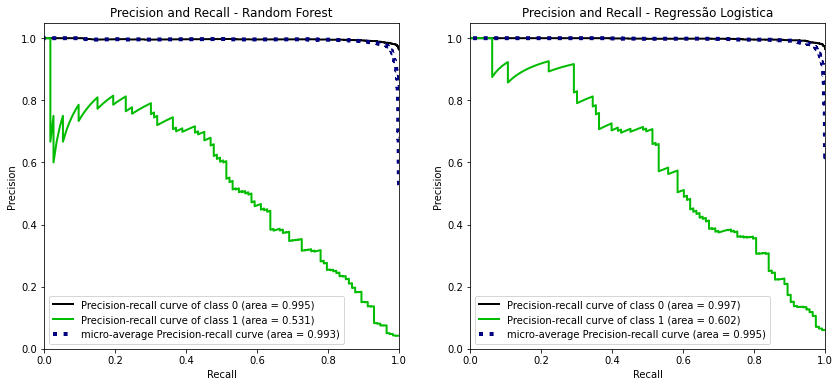

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_precision_recall(y_teste, proba, ax=axs[0], title="Precision and Recall - Random Forest")
skplt.metrics.plot_precision_recall(y_teste, proba_logi, ax=axs[1], title="Precision and Recall - Regressão Logistica")
plt.show()

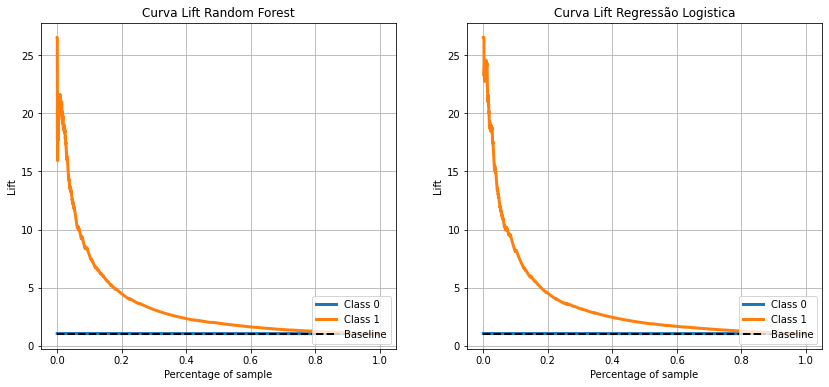

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_lift_curve(y_teste, proba, ax=axs[0], title="Curva Lift Random Forest")
skplt.metrics.plot_lift_curve(y_teste, proba_logi, ax=axs[1], title="Curva Lift Regressão Logistica")
plt.show()

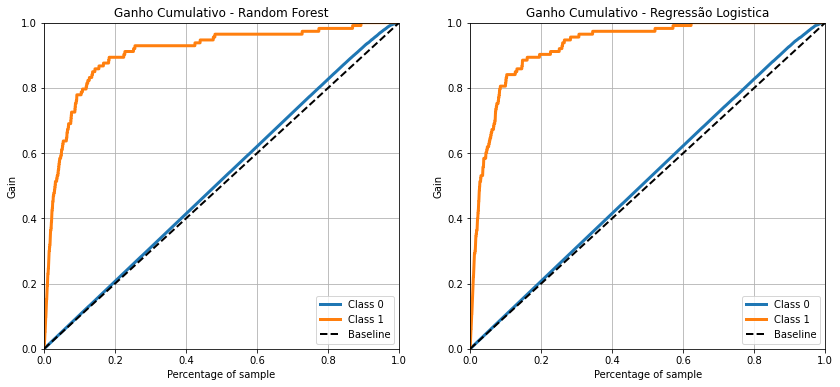

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_cumulative_gain(y_teste, proba, ax=axs[0], title="Ganho Cumulativo - Random Forest")
skplt.metrics.plot_cumulative_gain(y_teste, proba_logi, ax=axs[1], title="Ganho Cumulativo - Regressão Logistica")
plt.show()

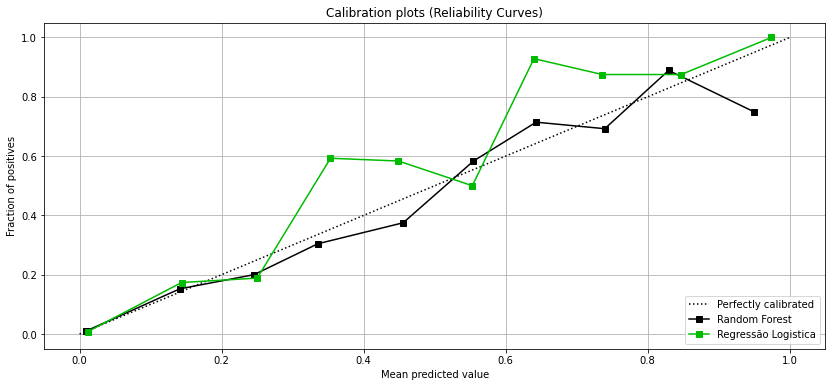

In [ ]:
probas_list = [proba, proba_logi]
modelos = ['Random Forest', 'Regressão Logistica']

skplt.metrics.plot_calibration_curve(y_teste, probas_list, modelos, figsize=(14,6))
plt.grid(True)
plt.show()